In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import lasagne
import theano
import theano.tensor as T
import gzip
from urllib.request import urlretrieve
from scipy.misc import imread, imresize
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [5]:
def download_data(filename, source='http://yann.lecun.com/exdb/mnist/'):
    urlretrieve(source + filename, filename)

def load_images(filename):
    download_data(filename)
    # Read the inputs in Yann LeCun's binary format.
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)

    data = data.reshape(-1, 1, 28, 28) # reshape to represent monochrome 2D images
    return data / np.float32(256) # normalize data

def load_labels(filename):
    download_data(filename)
    # Read the inputs in Yann LeCun's binary format.
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    return data

In [6]:
X_train = load_images('train-images-idx3-ubyte.gz')
y_train = load_labels('train-labels-idx1-ubyte.gz')
X_test = load_images('t10k-images-idx3-ubyte.gz')
y_test = load_labels('t10k-labels-idx1-ubyte.gz')

In [7]:
X_train.shape

(60000, 1, 28, 28)

In [8]:
X_train[4][0].shape

(28, 28)

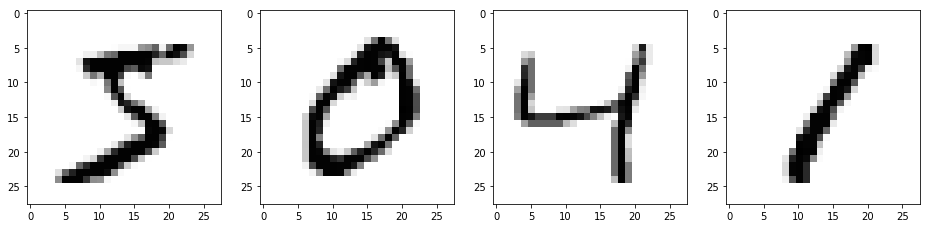

In [9]:
plts, axes = plt.subplots(1, 4, figsize = (16, 5))
axes[0].imshow(X_train[0][0], cmap = cm.Greys)
axes[1].imshow(X_train[1][0], cmap = cm.Greys)
axes[2].imshow(X_train[2][0], cmap = cm.Greys)
axes[3].imshow(X_train[3][0], cmap = cm.Greys)

In [10]:
print(X_train.shape)
print(y_train.shape)

(60000, 1, 28, 28)
(60000,)


In [11]:
print(y_train[0], y_train[1], y_train[2], y_train[3])

5 0 4 1


In [11]:
X_train, X_val = X_train[:-10000], X_train[-10000:]
y_train, y_val = y_train[:-10000], y_train[-10000:]

In [13]:
# Neural Network for Training the model:

from lasagne import layers
from lasagne.updates import nesterov_momentum
from lasagne.nonlinearities import softmax
from nolearn.lasagne import NeuralNet

In [15]:
# Method 1 - Not working yet
nnet = NeuralNet(
layers=[ # three layers: one hidden layer
('input', layers.InputLayer),
('hidden1', layers.DenseLayer),
('hidden2', layers.DenseLayer),
('hidden3', layers.DenseLayer),
('output', layers.DenseLayer),
],
    
# layer parameters:
input_shape=(None, 1, 28, 28), # 96x96 input pixels per batch
hidden1_num_units=500, # number of units i|n hidden layer
hidden2_num_units=500, # number of units in hidden layer
hidden3_num_units=500, # number of units in hidden layer
output_nonlinearity= softmax, # output layer uses identity function
output_num_units=10, # 30 target values
    
# optimization method:
update=nesterov_momentum,
update_learning_rate=0.05,
update_momentum=0.9,
regression=False, # flag to indicate we're dealing with regression problem
max_epochs=20, # we want to train this many epochs
verbose=1,
)

nnet.fit(X_train, y_train)

# Neural Network with 898510 learnable parameters

## Layer information

  #  name     size
---  -------  -------
  0  input    1x28x28
  1  hidden1  500
  2  hidden2  500
  3  hidden3  500
  4  output   10

  epoch    trn loss    val loss    trn/val    valid acc  dur
-------  ----------  ----------  ---------  -----------  ------
      1     0.33349     0.16002    2.08397      0.94993  11.43s
      2     0.11800     0.11470    1.02870      0.96362  10.67s
      3     0.07532     0.10437    0.72169      0.96632  10.68s
      4     0.04940     0.09866    0.50069      0.97121  10.72s
      5     0.03331     0.09721    0.34266      0.97221  10.91s
      6     0.02607     0.09480    0.27495      0.97431  10.66s
      7     0.02153     0.09490    0.22693      0.97551  10.82s
      8     0.01655     0.09653    0.17147      0.97641  10.67s
      9     0.01403     0.11254    0.12468      0.97371  10.47s
     10     0.01237     0.10409    0.11884      0.97631  10.63s
     11     0.00817     0.1

NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x0000025AD41686A0>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x0000025AD4168668>,
     check_input=True, custom_scores=None, hidden1_num_units=500,
     hidden2_num_units=500, hidden3_num_units=500,
     input_shape=(None, 1, 28, 28),
     layers=[('input', <class 'lasagne.layers.input.InputLayer'>), ('hidden1', <class 'lasagne.layers.dense.DenseLayer'>), ('hidden2', <class 'lasagne.layers.dense.DenseLayer'>), ('hidden3', <class 'lasagne.layers.dense.DenseLayer'>), ('output', <class 'lasagne.layers.dense.DenseLayer'>)],
     loss=None, max_epochs=20, more_params={},
     objective=<function objective at 0x0000025AD42F11E0>,
     objective_loss_function=<function categorical_crossentropy at 0x0000025AD0D769D8>,
     on_batch_finished=[],
     on_epoch_finished=[<nolearn.lasagne.handlers.PrintLog object at 0x0000025AD4305198>],
     on_training_finished=[],

In [16]:
nnet.predict(X_val)

array([3, 8, 6, ..., 5, 6, 8], dtype=int64)

In [17]:
nnet.score(X_val, y_val)

0.9798